In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)
n_samples = 1000
annual_income = np.random.normal(50000, 15000, n_samples)  # Annual income
loan_amount = np.random.normal(15000, 5000, n_samples)  # Loan amount
credit_score = np.random.normal(700, 50, n_samples)  # Credit score
loan_term = np.random.choice([36, 60], size=n_samples)  # Loan term in months
interest_rate = np.random.normal(12, 4, n_samples)  # Interest rate


In [3]:
loan_status = (
    (loan_amount > 20000) &
    (credit_score < 650) &
    (annual_income < 40000)
).astype(int)


In [4]:
df = pd.DataFrame({
    'annual_income': annual_income,
    'loan_amount': loan_amount,
    'credit_score': credit_score,
    'loan_term': loan_term,
    'interest_rate': interest_rate,
    'loan_status': loan_status
})
print(df.head())


   annual_income   loan_amount  credit_score  loan_term  interest_rate  \
0   57450.712295  21996.777183    666.241086         60      14.022357   
1   47926.035482  19623.168415    692.774066         60      17.956452   
2   59715.328072  15298.151850    660.379004         60      21.085799   
3   72845.447846  11765.316111    684.601924         60      10.382410   
4   46487.699379  18491.116568    605.319267         36      13.965718   

   loan_status  
0            0  
1            0  
2            0  
3            0  
4            0  


In [5]:
df = df.dropna()


In [6]:
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
fa = FactorAnalysis(n_components=3)
X_train_fa = fa.fit_transform(X_train_scaled)
X_test_fa = fa.transform(X_test_scaled)

In [9]:
model = LogisticRegression()
model.fit(X_train_fa, y_train)
y_pred = model.predict(X_test_fa)
y_pred_prob = model.predict_proba(X_test_fa)[:, 1]


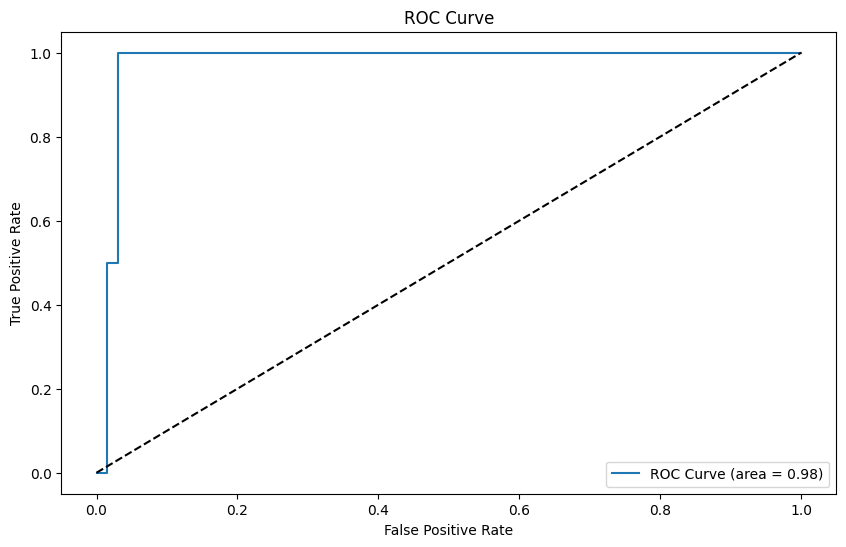

In [10]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [11]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200

Confusion Matrix:
 [[198   0]
 [  2   0]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

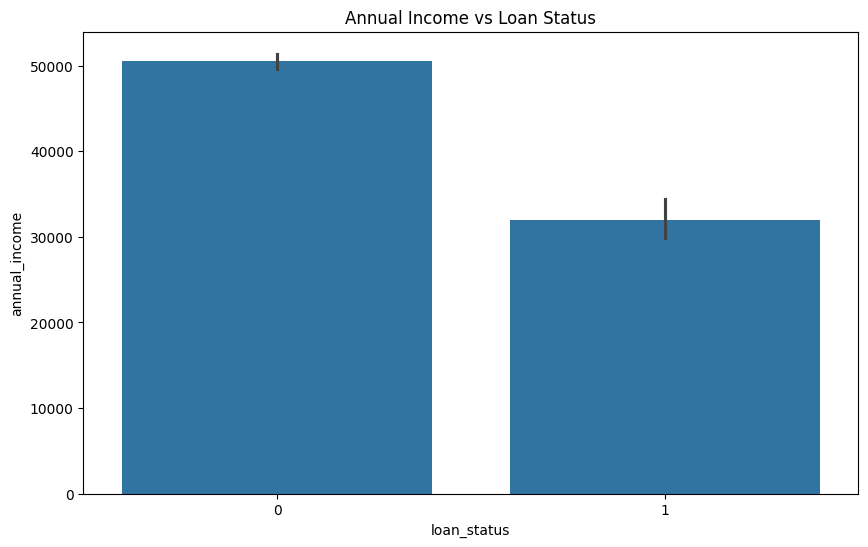

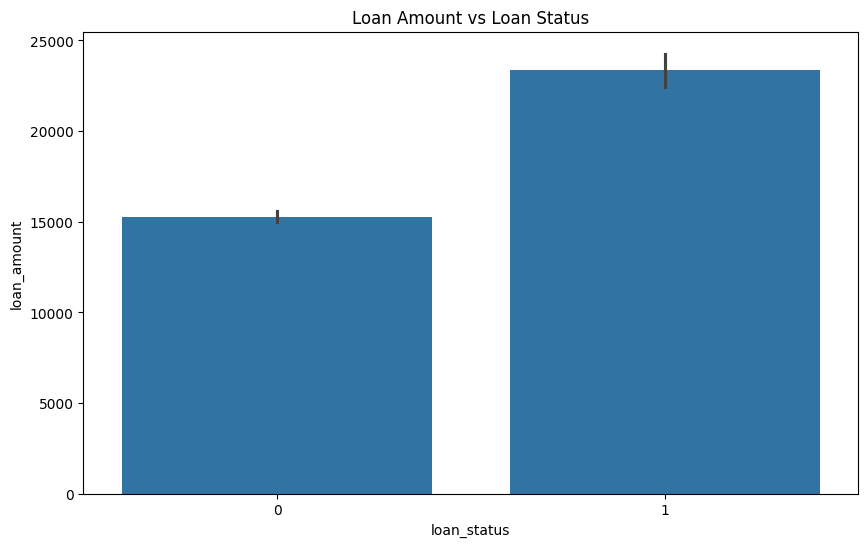

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='annual_income', data=df)
plt.title('Annual Income vs Loan Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='loan_amount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.show()